<a href="https://colab.research.google.com/github/arahmanmdmajid/DS_AI_11/blob/main/ML%20Guided%20Project%2001/ML_Guided_Project_01_GTU_Admissions_Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [178]:
df = pd.read_csv('/content/drive/MyDrive/Atomcamp DS&AI Bootcamp 2025/Machine Learning/Admission_Predict.csv')

In [179]:
for col in df.columns:
  print('-----------------------------------')
  print(f'\n{col}: {df[col].value_counts()}\n')

-----------------------------------

Serial No.: Serial No.
384    1
383    1
382    1
381    1
380    1
      ..
5      1
4      1
3      1
2      1
1      1
Name: count, Length: 400, dtype: int64

-----------------------------------

GRE Score: GRE Score
324    19
312    19
322    14
314    14
316    14
325    13
321    13
327    12
311    12
320    12
317    12
308    11
313    11
326    11
323    10
315    10
319     9
300     9
329     9
318     9
304     8
307     8
331     8
340     8
305     8
301     8
310     8
299     8
334     7
298     7
309     6
330     6
328     6
306     6
332     6
296     5
302     5
336     5
303     5
338     4
295     4
333     4
297     4
335     4
339     3
290     2
294     2
337     1
293     1
Name: count, dtype: int64

-----------------------------------

TOEFL Score: TOEFL Score
110    37
105    28
107    26
104    25
106    24
112    21
100    19
99     18
108    17
109    17
111    17
102    17
103    16
114    15
113    14
101    11
116 

In [180]:
#checking data and inconsistencies
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [181]:
# check the STD and outliers in the data
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [182]:
#drop serial number column
df.drop('Serial No.', axis=1, inplace=True)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [183]:
#checking missing value
df.isnull().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [184]:
#checking duplicates
df.duplicated().sum()

np.int64(0)

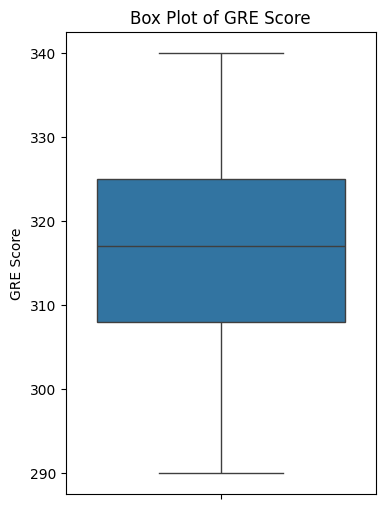

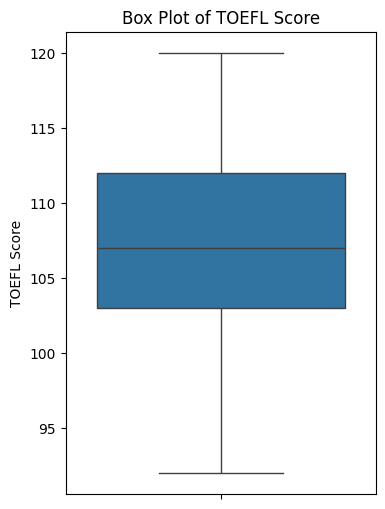

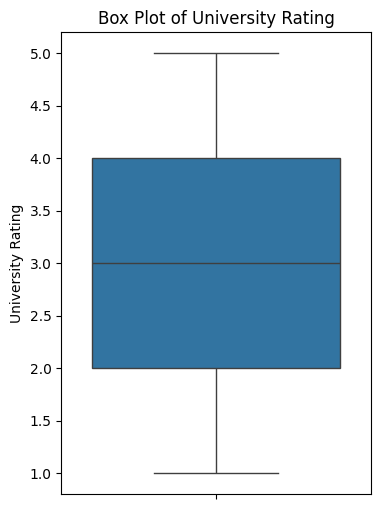

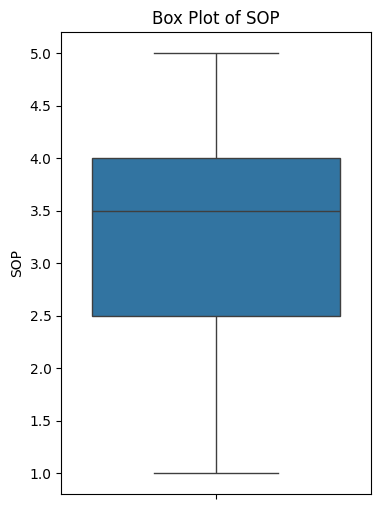

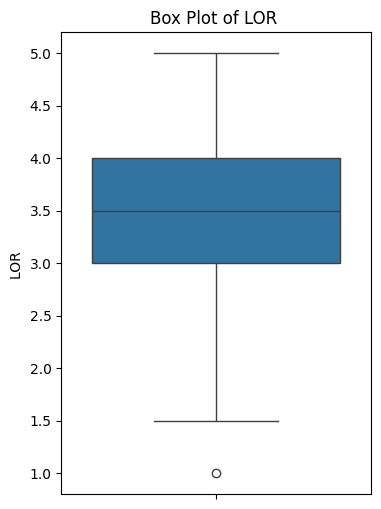

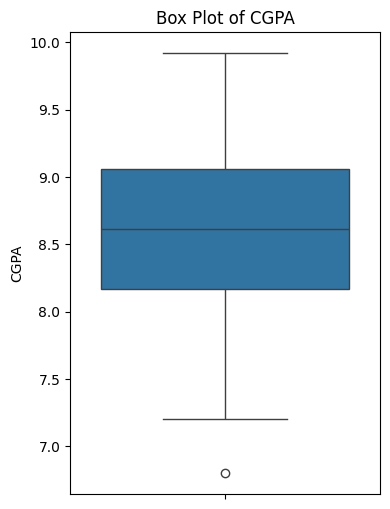

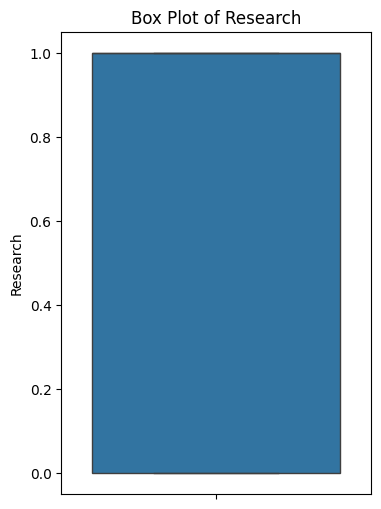

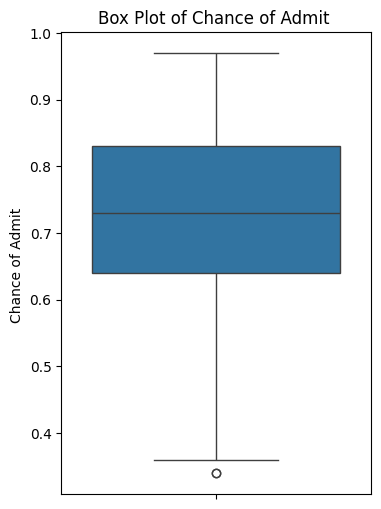

In [185]:
#checking outliers
for col in df.columns:
  plt.figure(figsize=(4,6))
  sns.boxplot(df[col])
  plt.title(f'Box Plot of {col}')
  plt.show()

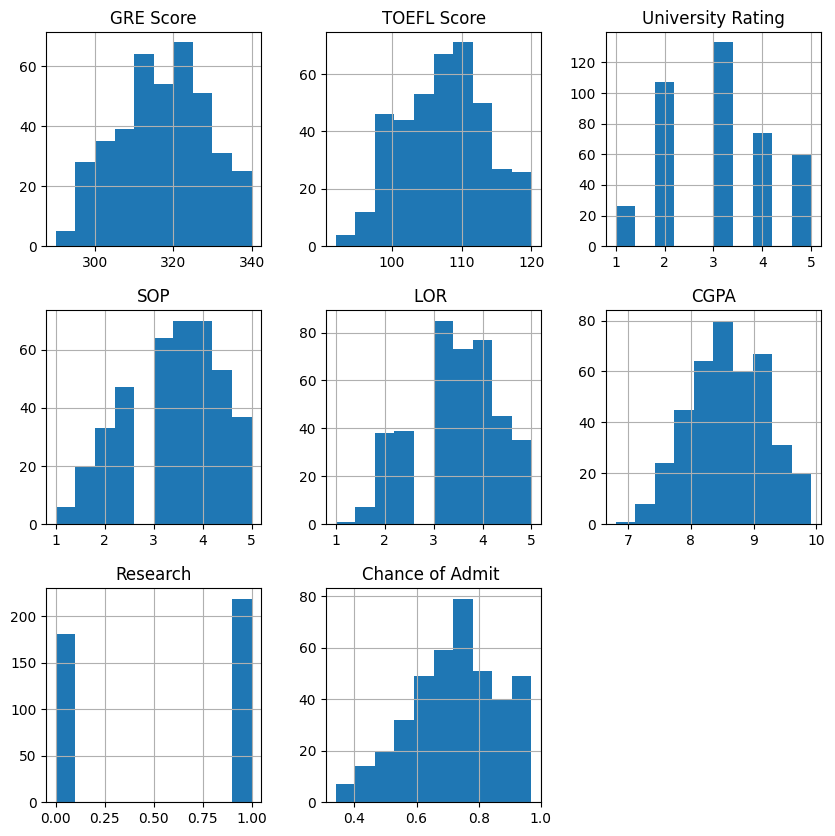

In [186]:
#scaling is important for cont/numerical columsn so we are going to explore them further
df.hist(figsize=(10,10))
plt.show()

#  we can see below that the cont columns have good distrubtiuon and close to
#  normal there is no need to perform normalization on them but we can will
#  perform scaling

# Handling Multicollinearity in Linear Regression

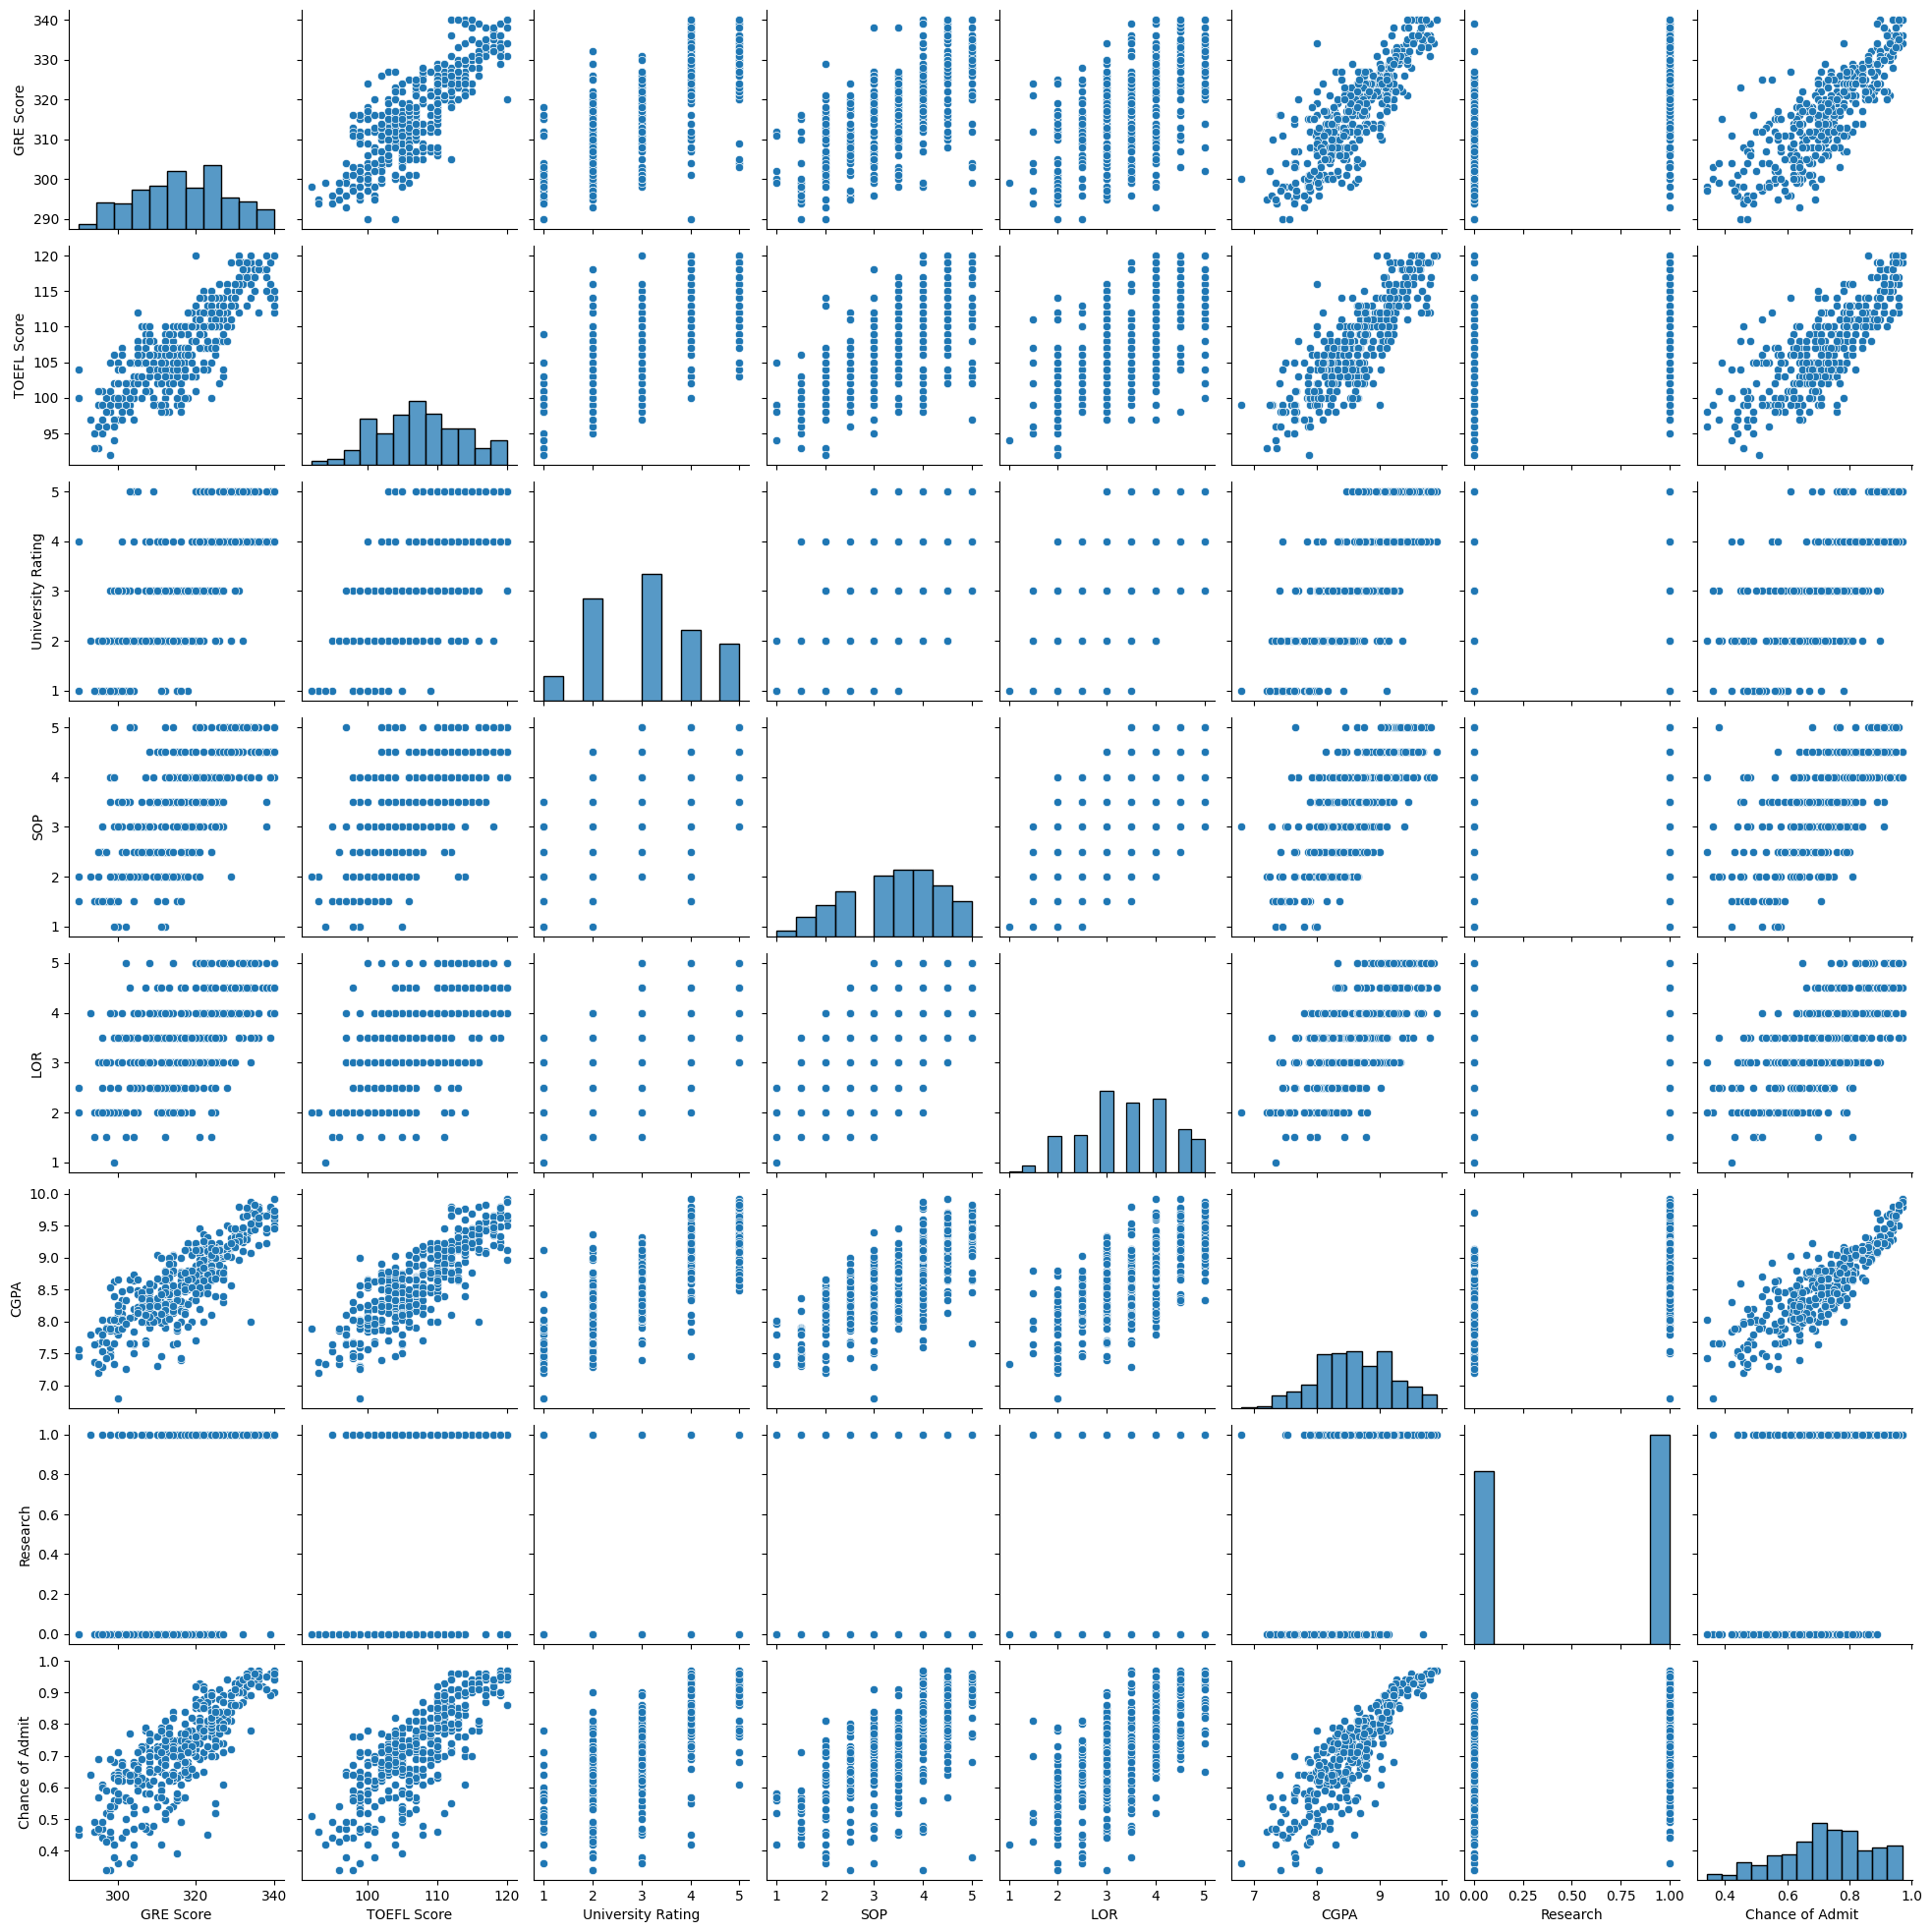

In [187]:
# next we will check lineartity among all columns
sns.pairplot(df)
plt.show()

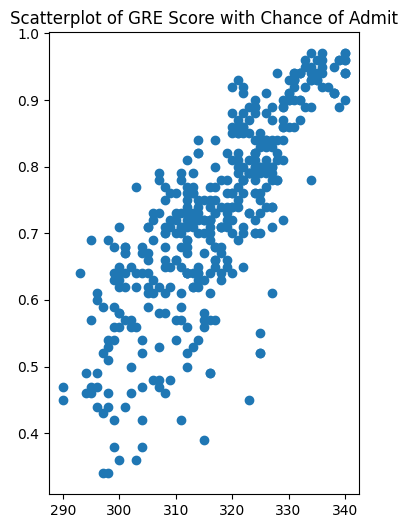

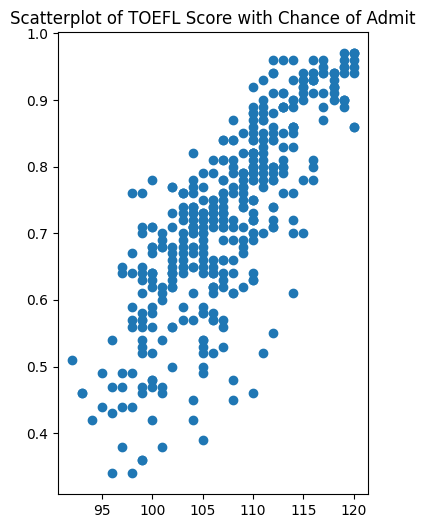

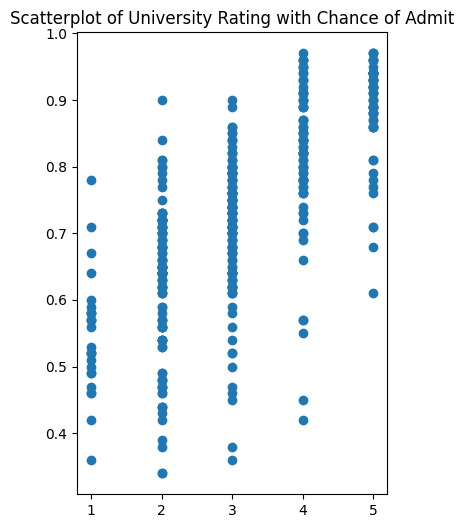

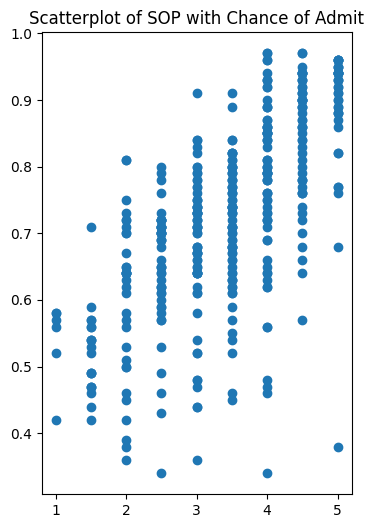

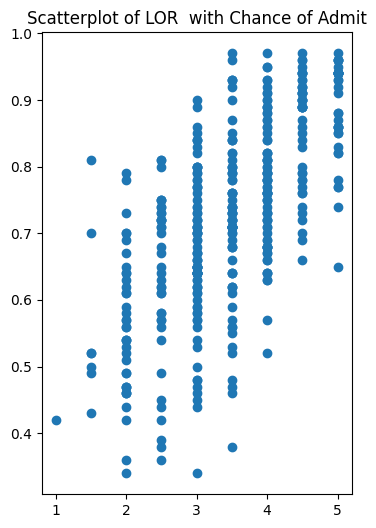

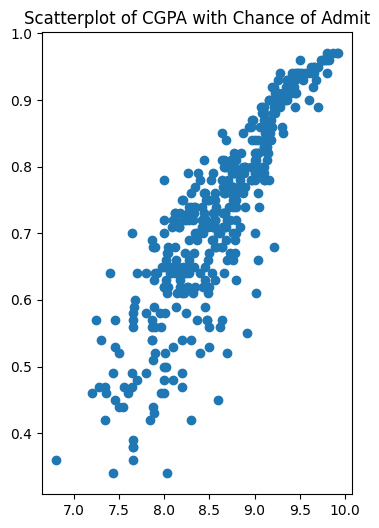

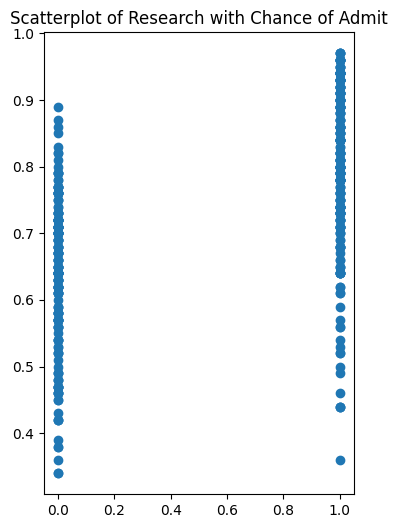

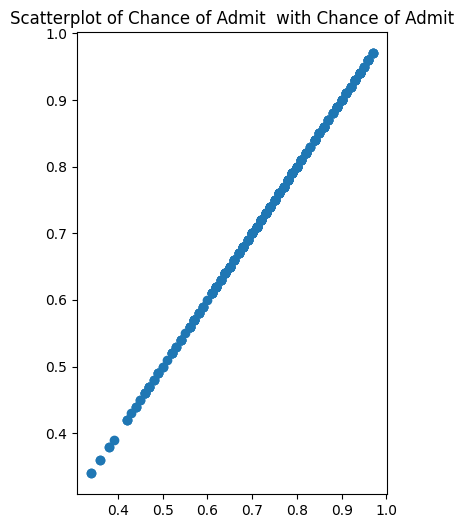

In [188]:
# we can further explore lineralitry with 'Chance of Admit' column
for col in df.columns:
  plt.figure(figsize=(4,6))
  plt.scatter(df[col], df[ 'Chance of Admit '])
  plt.title(f'Scatterplot of {col} with Chance of Admit')
  plt.show()

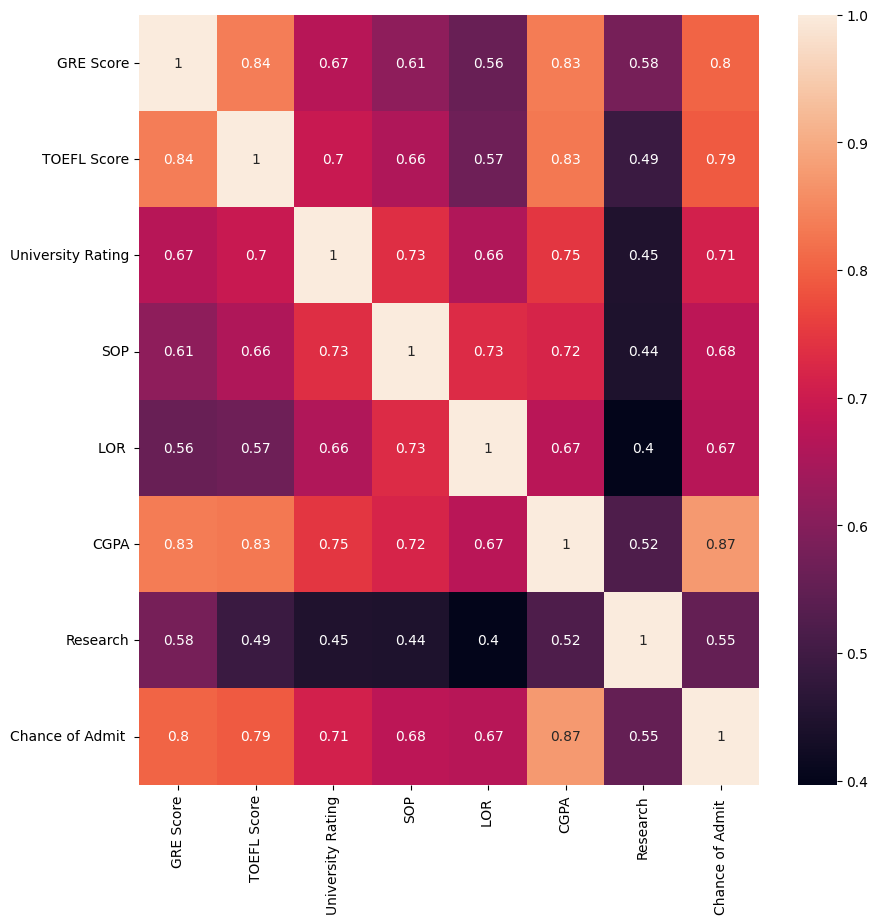

In [189]:
# we are checking the correlation between all columns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

# So anything about 0.4/0.5 will indicate towards multicolineairy

#  This also shows that Mulitple Linear Regression is not a good model here as
#  the below heatmap show multicolinearity

In [190]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [191]:
# Scaling all data except 'Chance of Admit' column

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[0.94      , 0.92857143, 0.75      , ..., 0.91346154, 1.        ,
        0.92063492],
       [0.68      , 0.53571429, 0.75      , ..., 0.66346154, 1.        ,
        0.66666667],
       [0.52      , 0.42857143, 0.5       , ..., 0.38461538, 1.        ,
        0.6031746 ],
       ...,
       [0.8       , 0.85714286, 0.75      , ..., 0.84935897, 1.        ,
        0.9047619 ],
       [0.44      , 0.39285714, 0.5       , ..., 0.63461538, 0.        ,
        0.52380952],
       [0.86      , 0.89285714, 0.75      , ..., 0.91666667, 1.        ,
        0.96825397]])

In [192]:
# Since the whole data has been restructure in the previous step we will convert
# it back to a dataframe

df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063
...,...,...,...,...,...,...,...,...
395,0.68,0.642857,0.50,0.625,0.625,0.717949,1.0,0.761905
396,0.70,0.535714,0.50,0.500,0.625,0.740385,1.0,0.793651
397,0.80,0.857143,0.75,1.000,0.875,0.849359,1.0,0.904762
398,0.44,0.392857,0.50,0.625,0.750,0.634615,0.0,0.523810


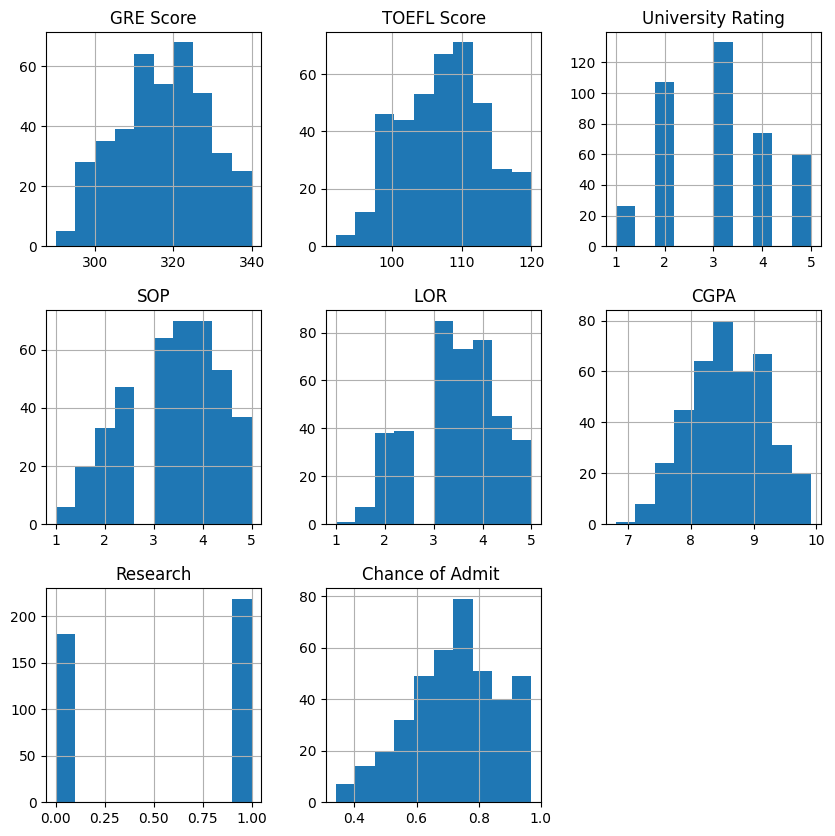

In [193]:
# we will check the hist for check the scale of the data

df.hist(figsize=(10,10))
plt.show()

# we can see below that the shape is maintained

In [194]:
X = df_scaled.drop(["Chance of Admit "], axis=1)
y = df_scaled['Chance of Admit '].values.reshape(-1,1)
print(X.shape)
print(y.shape)

(400, 7)
(400, 1)


After the featre engineering has been performed

And we are now ready for model training

In [195]:
# Scaling th data using standard scaler
scaler = StandardScaler()
df_standard_scaled = scaler.fit(df_scaled)
df_standard_scaled

StandardScaler()

In [196]:
# splitting the dataset into test and train portions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [197]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 7)
(80, 7)
(320, 1)
(80, 1)


In [198]:
# creating linear regression
multi_linear_model = LinearRegression()
multi_linear_model.fit(X_train, y_train)

LinearRegression()

In [199]:
# Getting predictions of the test data and calculating metrics
y_pred = multi_linear_model.predict(X_test)
y_pred_training = multi_linear_model.predict(X_train)

#Here we are also checking for underfitting and overfitting
print("R2 test score", r2_score(y_test, y_pred))
print("R2 train score", r2_score(y_train, y_pred_training))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 test score 0.783979025642848
R2 train score 0.8072828997302366
MSE: 0.01066422420851834
RMSE: 0.10326773072222678
MAE: 0.07624563160337397


In [200]:
#  Now lets check for some random values
c=np.array([.5,.3,.58,.68,.98,.78,1]).reshape(1, -1)
b=multi_linear_model.predict(c)
b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[0.76988956]])

#Decision Tree Regressor Optimization


In [201]:
tree_regress_model = DecisionTreeRegressor()
tree_regress_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [202]:
y_pred_dtr = tree_regress_model.predict(X_test)
y_pred_dtr

array([0.06349206, 0.93650794, 0.47619048, 0.61904762, 0.61904762,
       0.98412698, 0.74603175, 0.87301587, 0.52380952, 0.6984127 ,
       0.22222222, 0.52380952, 0.3968254 , 0.87301587, 0.88888889,
       0.46031746, 0.92063492, 0.52380952, 0.31746032, 0.46031746,
       0.76190476, 0.80952381, 0.92063492, 0.66666667, 0.95238095,
       0.57142857, 0.34920635, 0.77777778, 0.76190476, 0.46031746,
       0.46031746, 0.46031746, 0.98412698, 0.52380952, 0.19047619,
       0.65079365, 0.52380952, 0.34920635, 0.19047619, 0.31746032,
       0.63492063, 0.38095238, 0.61904762, 0.65079365, 0.93650794,
       0.47619048, 0.84126984, 0.47619048, 0.42857143, 0.82539683,
       0.57142857, 0.55555556, 0.79365079, 0.53968254, 0.80952381,
       0.92063492, 0.79365079, 0.6031746 , 0.31746032, 0.58730159,
       0.93650794, 0.63492063, 0.55555556, 1.        , 0.19047619,
       0.6031746 , 0.46031746, 0.87301587, 0.77777778, 0.46031746,
       0.82539683, 0.34920635, 0.58730159, 0.6984127 , 0.55555

In [203]:
print("--------------------Result for LR----------------------------------------------")
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("--------------------Result for DT----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_pred_dtr))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_pred_dtr)))
print("MAE for DT:", mean_absolute_error(y_test, y_pred_dtr))
print("R² Score for DT:", r2_score(y_test, y_pred_dtr))

--------------------Result for LR----------------------------------------------
MSE: 0.01066422420851834
RMSE: 0.10326773072222678
MAE: 0.07624563160337397
R² Score: 0.783979025642848
--------------------Result for DT----------------------------------------------
MSE for DT: 0.022685185185185194
RMSE for DT: 0.15061601901917734
MAE for DT: 0.10853174603174605
R² Score for DT: 0.5404751708744322


In [204]:
#using grid searchCV to get best parameters for decision tree regressor
param = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [None, 5, 10, 15, 20,25,35],
    'min_samples_split': [2, 3,4,5,6,7, 10, 20],
    'splitter': ['best', 'random']
}
# Performing GridSearchCV
grid_search = GridSearchCV(tree_regress_model, cv=5, param_grid=param)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_estimator_)
print("Best Score (R2):", grid_search.best_score_)

# Evaluating on test data
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Score (R2):", test_score)

Best Parameters: DecisionTreeRegressor(criterion='poisson', max_depth=10, min_samples_split=20,
                      splitter='random')
Best Score (R2): 0.7310395146789237
Test Score (R2): 0.708553324471272


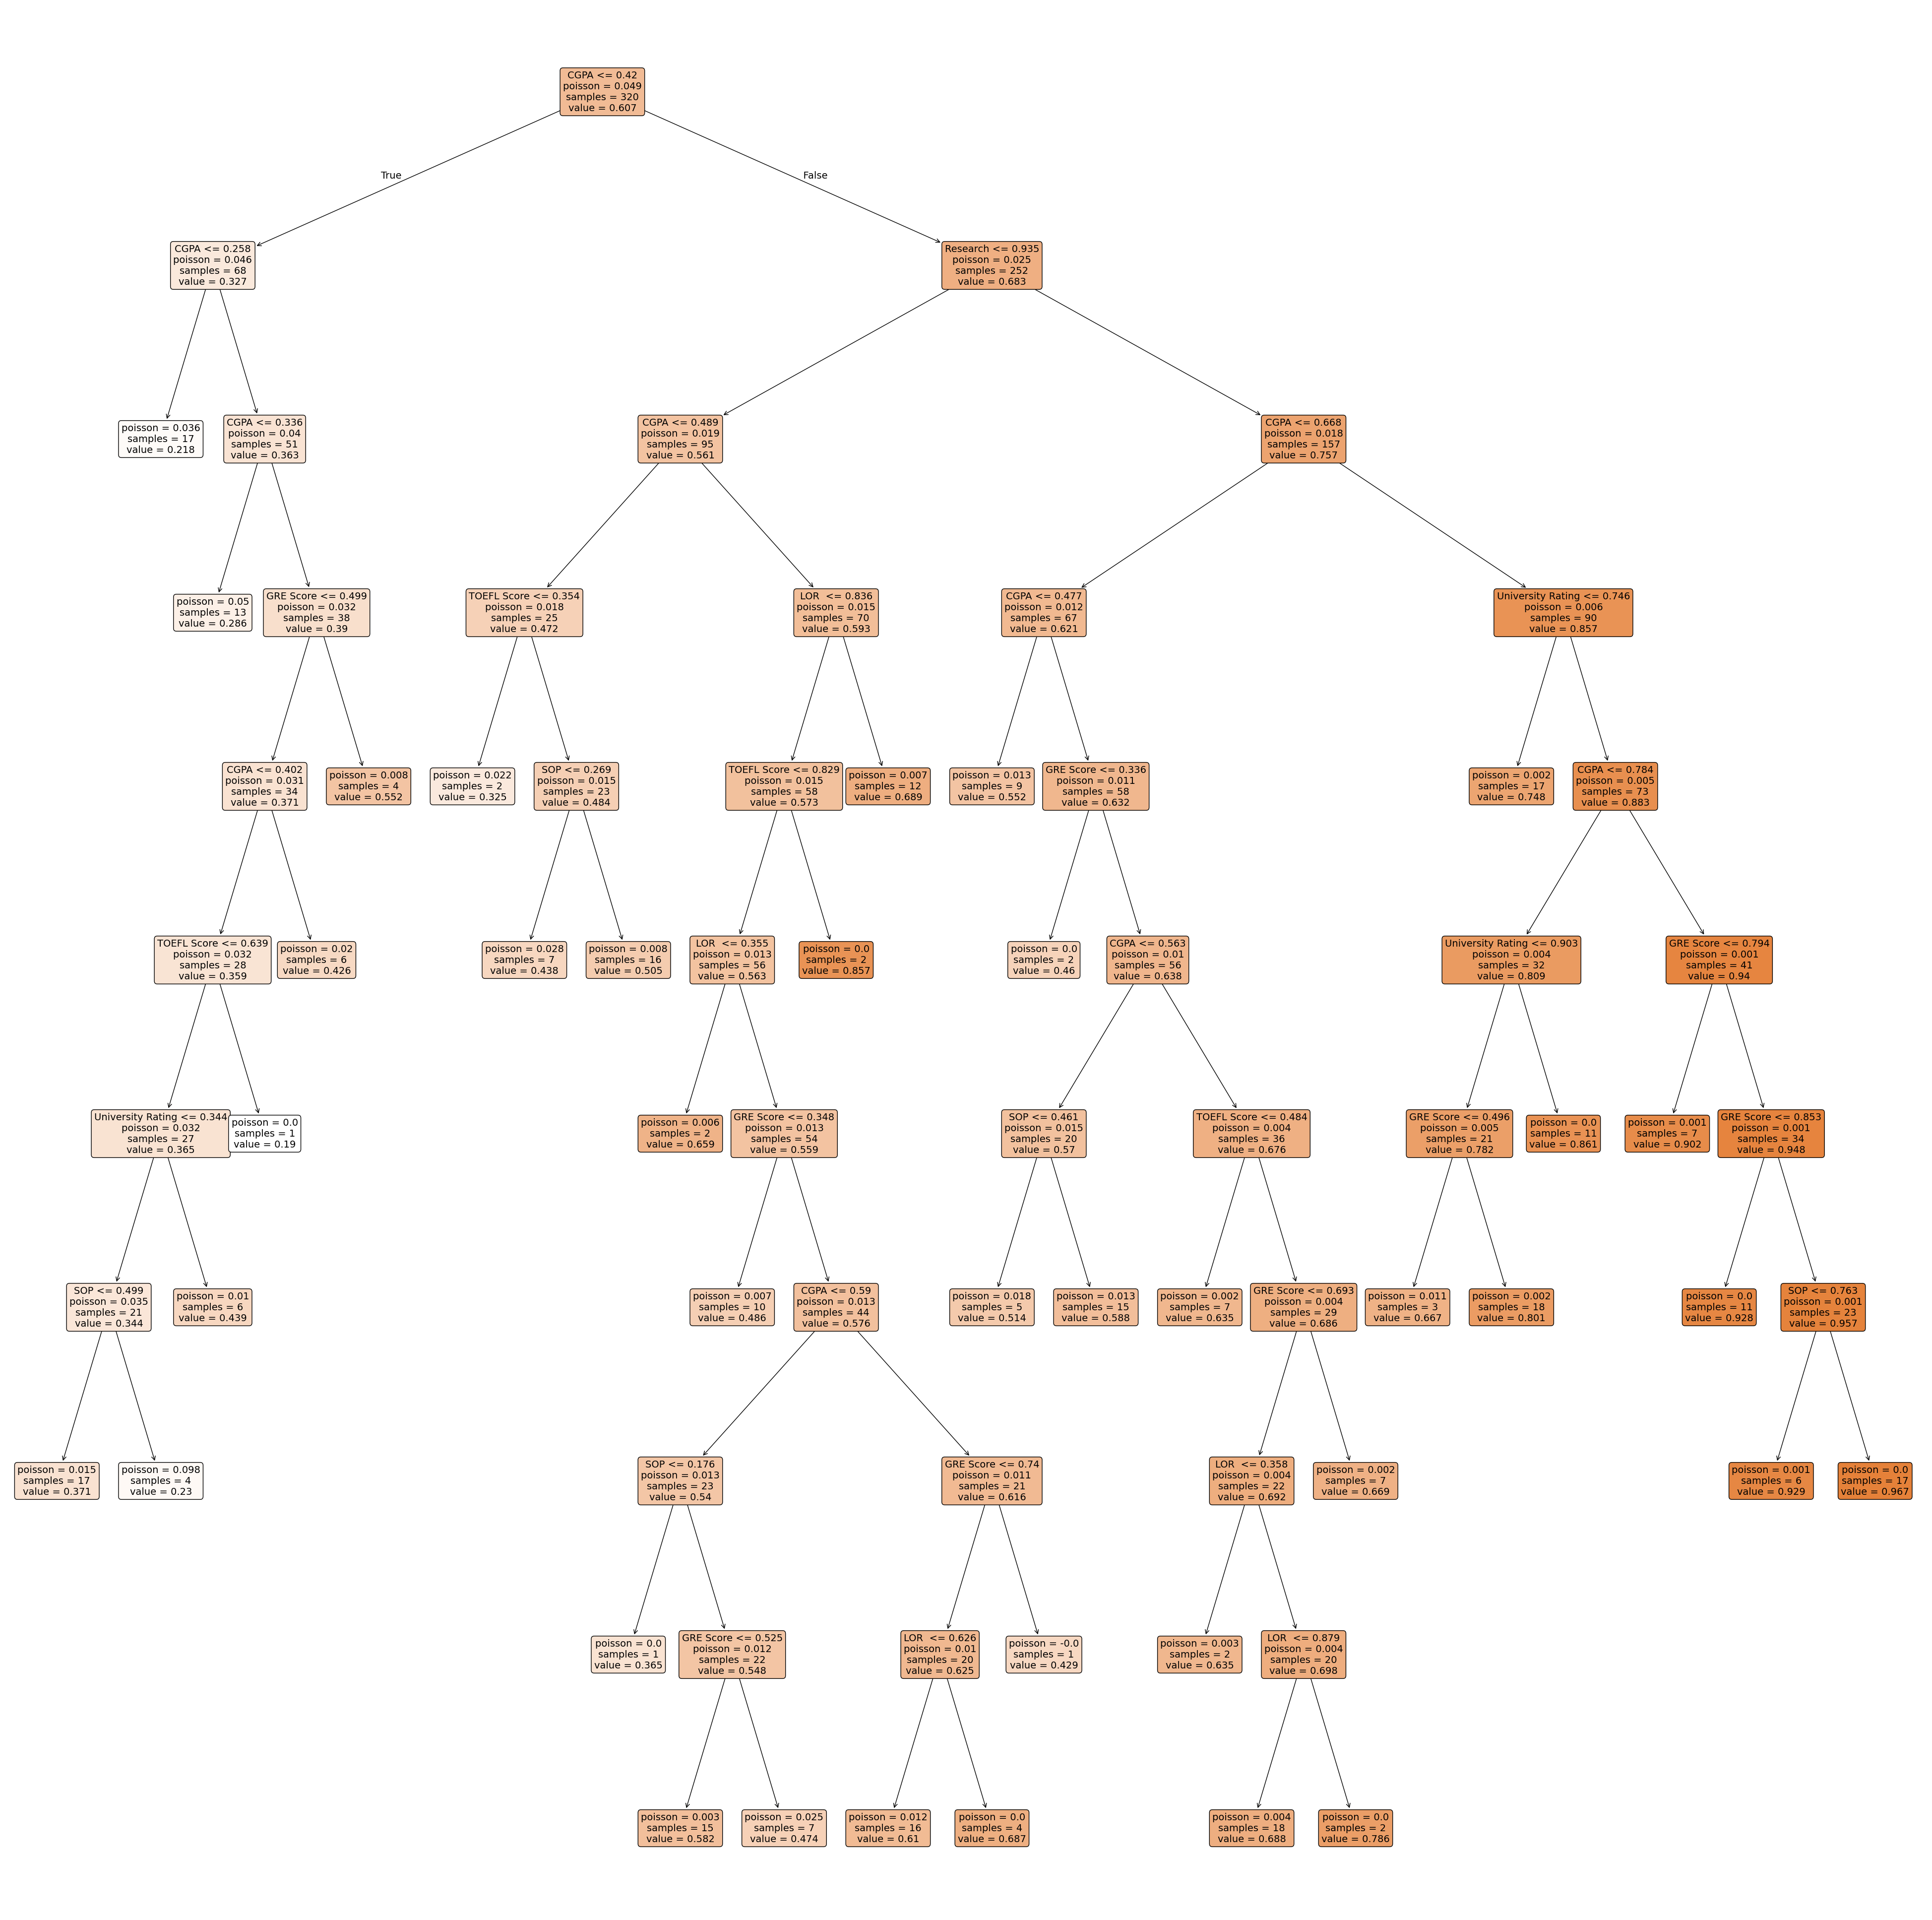

In [205]:
plt.figure(figsize=(50,50))
a = plot_tree(best_model,
              feature_names=X.columns, #???
              class_names=y, #??
              filled=True,
              rounded=True,
              fontsize=14)

In [206]:
print("--------------------Prediction with LR----------------------------------------------")
c=np.array([.5,.3,.58,.68,.98,.78,1]).reshape(1, -1)
b=multi_linear_model.predict(c)
print(b)
print("--------------------Prediction with DT----------------------------------------------")
b1=best_model.predict(c)
print(b1)

--------------------Prediction with LR----------------------------------------------
[[0.76988956]]
--------------------Prediction with DT----------------------------------------------
[0.74789916]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


# Random Forest Regressor Tuning


In [207]:
# train model while applying hyperparameter tuning
random_forest_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
random_forest_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [208]:
y_rf_pred = random_forest_model.predict(X_test)
y_rf_pred

array([0.21603175, 0.92111111, 0.42126984, 0.52507937, 0.68380952,
       0.94603175, 0.6131746 , 0.83730159, 0.40904762, 0.59603175,
       0.42777778, 0.44301587, 0.30873016, 0.8647619 , 0.91730159,
       0.60761905, 0.94952381, 0.60761905, 0.24095238, 0.44873016,
       0.71888889, 0.78634921, 0.91079365, 0.67920635, 0.95571429,
       0.60936508, 0.42412698, 0.81984127, 0.78095238, 0.32349206,
       0.42253968, 0.50761905, 0.98063492, 0.48174603, 0.31269841,
       0.57285714, 0.6315873 , 0.5715873 , 0.19380952, 0.32698413,
       0.59730159, 0.4731746 , 0.60269841, 0.61587302, 0.92174603,
       0.49111111, 0.82984127, 0.34809524, 0.42492063, 0.89746032,
       0.52920635, 0.39174603, 0.75634921, 0.48174603, 0.7968254 ,
       0.8568254 , 0.76365079, 0.57111111, 0.46555556, 0.41111111,
       0.93047619, 0.61063492, 0.68412698, 0.98555556, 0.23936508,
       0.61222222, 0.47571429, 0.78619048, 0.82825397, 0.34825397,
       0.87095238, 0.46031746, 0.53984127, 0.74301587, 0.57174

In [209]:
print("--------------------Result for RF----------------------------------------------")
print("MSE for RF:", mean_squared_error(y_test, y_rf_pred))
print("RMSE for RF:", np.sqrt(mean_squared_error(y_test, y_rf_pred)))
print("MAE for RF:", mean_absolute_error(y_test, y_rf_pred))
print("R² Score for RF:", r2_score(y_test, y_rf_pred))

--------------------Result for RF----------------------------------------------
MSE for RF: 0.012592068846056953
RMSE for RF: 0.11221438787453664
MAE for RF: 0.07698214285714292
R² Score for RF: 0.7449274388731657


In [210]:
# Comparing different results

print("--------------------Result for LR----------------------------------------------")
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("--------------------Result for DT not tuned----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_pred_dtr))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_pred_dtr)))
print("MAE for DT:", mean_absolute_error(y_test, y_pred_dtr))
print("R² Score for DT:", r2_score(y_test, y_pred_dtr))
print("--------------------Result for DT tuned----------------------------------------------")
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Score (R2):", test_score)

print("--------------------Result for RF not tuned----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_rf_pred))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_rf_pred)))
print("MAE for DT:", mean_absolute_error(y_test, y_rf_pred))
print("R² Score for DT:", r2_score(y_test, y_rf_pred))

--------------------Result for LR----------------------------------------------
MSE: 0.01066422420851834
RMSE: 0.10326773072222678
MAE: 0.07624563160337397
R² Score: 0.783979025642848
--------------------Result for DT not tuned----------------------------------------------
MSE for DT: 0.022685185185185194
RMSE for DT: 0.15061601901917734
MAE for DT: 0.10853174603174605
R² Score for DT: 0.5404751708744322
--------------------Result for DT tuned----------------------------------------------
Test Score (R2): 0.708553324471272
--------------------Result for RF not tuned----------------------------------------------
MSE for DT: 0.012592068846056953
RMSE for DT: 0.11221438787453664
MAE for DT: 0.07698214285714292
R² Score for DT: 0.7449274388731657


In [211]:
print("--------------------Prediction with LR----------------------------------------------")
c=np.array([.5,.3,.58,.68,.98,.78,1]).reshape(1, -1)
b=multi_linear_model.predict(c)
print(b)
print("--------------------Prediction with DT best parameters----------------------------------------------")
b1=best_model.predict(c)
print(b1)
print("--------------------Prediction with RF without tuning----------------------------------------------")
b2=random_forest_model.predict(c)
print(b2)

--------------------Prediction with LR----------------------------------------------
[[0.76988956]]
--------------------Prediction with DT best parameters----------------------------------------------
[0.74789916]
--------------------Prediction with RF without tuning----------------------------------------------
[0.8515873]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [212]:
# Further tuning RF with additional paramertes
random_forest_model_tuned = RandomForestRegressor(n_estimators = 900, random_state = 42,max_depth=35, min_samples_split=20)
# n_estimators = 900 --> Tree number
# random_state = 42  --> Sample number
random_forest_model_tuned.fit(X_train,y_train)
y_rf_pred_tuned = random_forest_model_tuned.predict(X_test)
y_rf_pred_tuned

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


array([0.25667262, 0.92304807, 0.34226499, 0.51224728, 0.67466589,
       0.94657815, 0.61463597, 0.80730568, 0.44988825, 0.57109712,
       0.47180405, 0.41030278, 0.31459413, 0.87687177, 0.92311179,
       0.64036338, 0.94638668, 0.61006207, 0.23731804, 0.44666776,
       0.69556886, 0.79144979, 0.92384637, 0.63966049, 0.94943169,
       0.64429982, 0.37262819, 0.83585615, 0.79687247, 0.37099554,
       0.39800956, 0.54134971, 0.96926256, 0.46125682, 0.35841921,
       0.58464787, 0.62286817, 0.53800767, 0.21001754, 0.29431748,
       0.5698834 , 0.48644151, 0.60459827, 0.57447467, 0.91929471,
       0.47552963, 0.83706285, 0.28823559, 0.42715421, 0.91900824,
       0.53271643, 0.30740619, 0.74088054, 0.4848012 , 0.79636242,
       0.86166148, 0.76477019, 0.58228883, 0.48367507, 0.42674745,
       0.90232954, 0.6007296 , 0.68689387, 0.96990768, 0.23805113,
       0.61561019, 0.46419236, 0.79250317, 0.83553911, 0.38279929,
       0.8578794 , 0.46621724, 0.52663182, 0.73677931, 0.56913

In [213]:
print("--------------------Result for RF  tuned----------------------------------------------")
print("R² Score for RF:", r2_score(y_test, y_rf_pred_tuned))

--------------------Result for RF  tuned----------------------------------------------
R² Score for RF: 0.7584841240255613


In [214]:
#evaluate
print("--------------------Result for LR----------------------------------------------")
print("R² Score:", r2_score(y_test, y_pred))
print("--------------------Result for DT not tuned----------------------------------------------")
print("R² Score for DT:", r2_score(y_test, y_pred_dtr))
print("--------------------Result for DT tuned----------------------------------------------")
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Score (R2) for yuned DT :", test_score)
print("--------------------Result for RF not tuned----------------------------------------------")
print("R² Score for RF:", r2_score(y_test, y_rf_pred))
print("--------------------Result for RF tuned----------------------------------------------")
print("R² Score for RF:", r2_score(y_test, y_rf_pred_tuned))

--------------------Result for LR----------------------------------------------
R² Score: 0.783979025642848
--------------------Result for DT not tuned----------------------------------------------
R² Score for DT: 0.5404751708744322
--------------------Result for DT tuned----------------------------------------------
Test Score (R2) for yuned DT : 0.708553324471272
--------------------Result for RF not tuned----------------------------------------------
R² Score for RF: 0.7449274388731657
--------------------Result for RF tuned----------------------------------------------
R² Score for RF: 0.7584841240255613


In [215]:
print("--------------------Prediction with LR----------------------------------------------")
c=np.array([.5,.3,.58,.68,.98,.78,1]).reshape(1, -1)
b=multi_linear_model.predict(c)
print(b)
print("--------------------Prediction with DT best parameters----------------------------------------------")
b1=best_model.predict(c)
print(b1)
print("--------------------Prediction with RF without tuning----------------------------------------------")
b2=random_forest_model.predict(c)
print(b2)
print("--------------------Prediction with RF tuned----------------------------------------------")
c=np.array([.5,.3,.58,.68,.98,.78,1]).reshape(1, -1)
b3=random_forest_model_tuned.predict(c)
print(b3)

--------------------Prediction with LR----------------------------------------------
[[0.76988956]]
--------------------Prediction with DT best parameters----------------------------------------------
[0.74789916]
--------------------Prediction with RF without tuning----------------------------------------------
[0.8515873]
--------------------Prediction with RF tuned----------------------------------------------
[0.86140793]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


#Feature Selection-Based Modeling

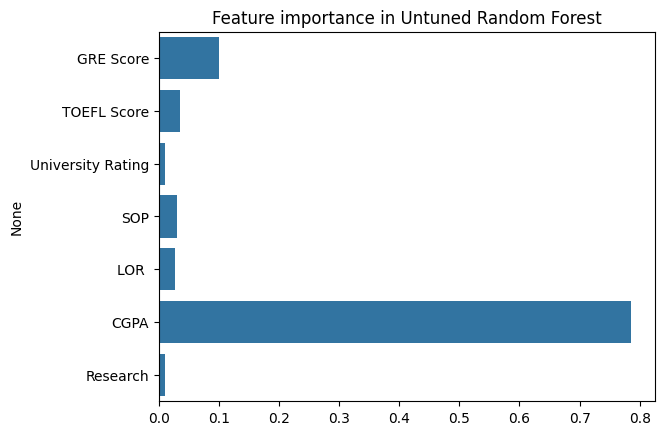

In [216]:
#  Get importance of feature within the random forest regression model
importances = random_forest_model.feature_importances_
feature_names = X.columns

# Plotting important features
sns.barplot(x=importances, y=feature_names)
plt.title('Feature importance in Untuned Random Forest')
plt.show()

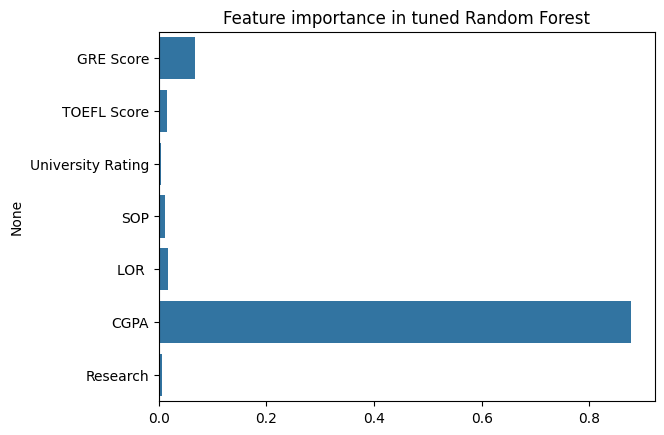

In [217]:
#  Get importance of feature within the random forest regression tunned model
importances_tuned = random_forest_model_tuned.feature_importances_
feature_names = X.columns

# Plotting important features
sns.barplot(x=importances_tuned, y=feature_names)
plt.title('Feature importance in tuned Random Forest')
plt.show()

In [218]:
# Creating a Data Frame from tuned importance of features
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances_tuned})

# Sorting for better handling
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
feature_importance_df

,feature,importance
5,CGPA,0.877185
0,GRE Score,0.067723
4,LOR,0.017830
1,TOEFL Score,0.015915
3,SOP,0.011248
6,Research,0.005764
2,University Rating,0.004336


In [219]:
# Selecting top 5 features based on importance
top5_features = feature_importance_df.head(5)
top5_features_list = top5_features['feature'].tolist()
top5_features_list

['CGPA', 'GRE Score', 'LOR ', 'TOEFL Score', 'SOP']

In [220]:
# New data sets based on the the top 5 features only
X_top5 = X[top5_features_list]
print(X_top5.shape)
print(y.shape)

(400, 5)
(400, 1)


In [221]:
# Split the new dataset
X_train_top5, X_test_top5, y_train, y_test = train_test_split(X_top5, y, test_size=0.2, random_state=2)

In [222]:
# Retrain Linear Regression model
multi_linear_top5 = LinearRegression()
multi_linear_top5.fit(X_train_top5, y_train)
y_pred_top5 = multi_linear_top5.predict(X_test_top5)

In [223]:
# Retrain Decision Tree Regressor model with tuning
tree_regress_top5 = DecisionTreeRegressor()
tree_regress_top5.fit(X_train_top5, y_train)

param = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [None, 5, 10, 15, 20,25,35],
    'min_samples_split': [2, 3,4,5,6,7, 10, 20],
    'splitter': ['best', 'random']
}
# Performing GridSearchCV
grid_search_top5 = GridSearchCV(tree_regress_top5, cv=5, param_grid=param)
grid_search_top5.fit(X_train_top5, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search_top5.best_estimator_)
print("Best Score (R2):", grid_search_top5.best_score_)

# Evaluating on test data
best_model_top5 = grid_search_top5.best_estimator_
test_score_top5 = best_model_top5.score(X_test_top5, y_test)
print("Test Score (R2):", test_score_top5)

y_pred_dtr_top5 = tree_regress_top5.predict(X_test_top5)

Best Parameters: DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                      min_samples_split=4, splitter='random')
Best Score (R2): 0.7283014526403617
Test Score (R2): 0.6638635830350673


In [224]:
# Retraining Random Forest model
random_forest_top5 = RandomForestRegressor(n_estimators = 900, random_state = 42,max_depth=35, min_samples_split=20)
random_forest_top5.fit(X_train_top5, y_train)
y_rf_pred_top5 = random_forest_top5.predict(X_test_top5)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [225]:
# Compare the results

print("\n--- Results with Top 5 Features ---")

print("\n--- Linear Regression with Top 5 Features ---")
print("R² Score:", r2_score(y_test_top5, y_pred_top5))

print("\n--- Decision Tree with Top 5 Features ---")
print("R² Score for DT:", r2_score(y_test_top5, y_pred_dtr_top5))

print("\n--- Random Forest with Top 5 Features ---")
print("R² Score for RF:", r2_score(y_test_top5, y_rf_pred_top5))


--- Results with Top 5 Features ---

--- Linear Regression with Top 5 Features ---
R² Score: 0.7727158003459389

--- Decision Tree with Top 5 Features ---
R² Score for DT: 0.5517671179458226

--- Random Forest with Top 5 Features ---
R² Score for RF: 0.7478430857074378
